In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [33]:
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

df = pd.read_csv("heart.csv")
print(df.head())

pd.set_option("display.float", "{:.2f}".format)
# df.describe()

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0     2.30      0   
1   37    1   2       130   250    0        1      187      0     3.50      0   
2   41    0   1       130   204    0        0      172      0     1.40      2   
3   56    1   1       120   236    0        1      178      0     0.80      2   
4   57    0   0       120   354    0        1      163      1     0.60      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  


<Axes: xlabel='target'>

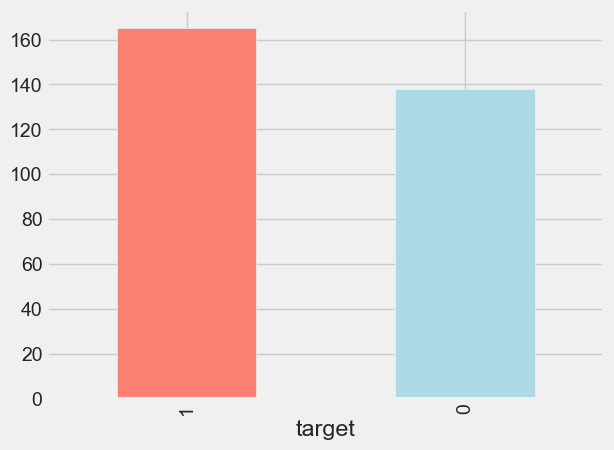

In [34]:
df.target.value_counts().plot(kind="bar", color=["salmon", "lightblue"])

In [35]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [36]:
categorical_val = []
continuous_val = []

for column in df.columns:
    print("=====================")
    print(f"{column} : {df[column].unique()}")
    if len(df[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continuous_val.append(column)



age : [63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77]
sex : [1 0]
cp : [3 2 1 0]
trestbps : [145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164]
chol : [233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309
 186 203 183 220 209 258 227 261 221 205 240 318 298 564 277 214 248 255
 207 223 288 160 394 315 246 244 270 195 196 254 126 313 262 215 193 271
 268 267 210 295 306 178 242 180 228 149 278 253 342 157 286 229 284 224
 206 167 230 335 276 353 225 330 290 172 305 188 282 185 326 274 164 307
 249 341 407 217 174 281 289 322 299 300 293 184 409 259 200 327 237 218
 319 166 311 169 187 176 241 131]
fbs :

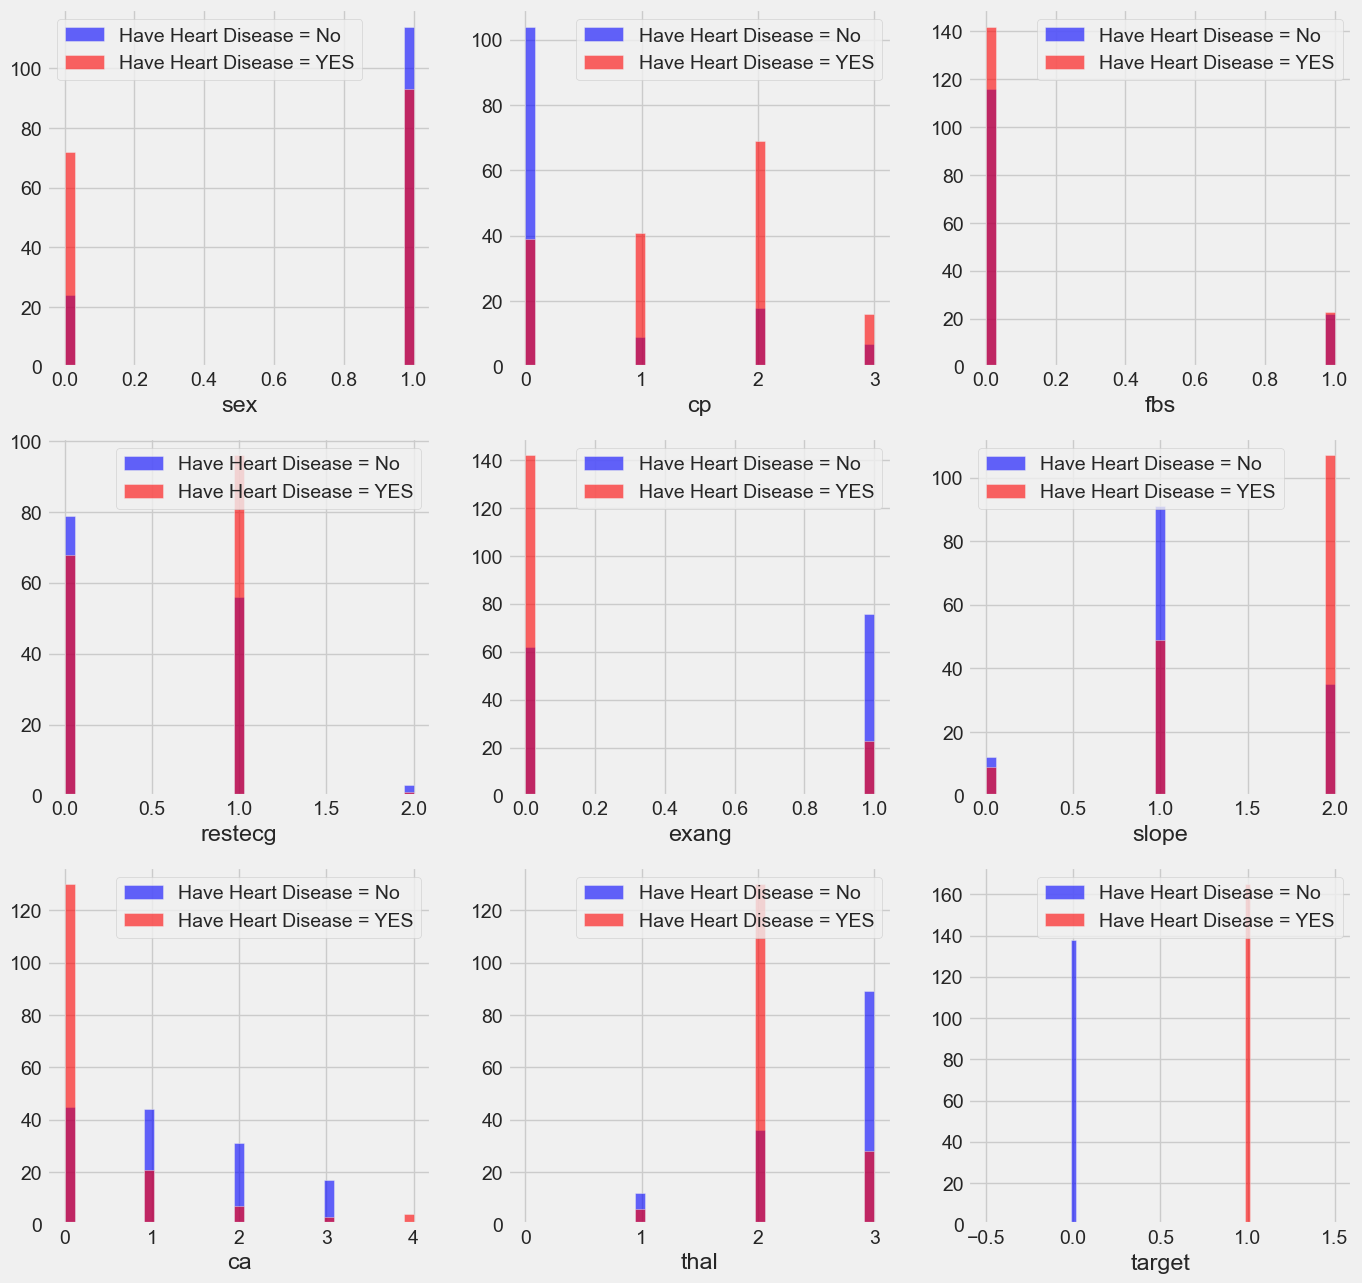

In [37]:
plt.figure(figsize=(15, 15))

for i, column in enumerate(categorical_val, 1):
    plt.subplot(3,3,i)
    df[df['target'] == 0][column].hist(bins=35, color='blue', label='Have Heart Disease = No', alpha=0.6)
    df[df['target'] == 1][column].hist(bins=35, color='red', label='Have Heart Disease = YES', alpha = 0.6)
    plt.legend()
    plt.xlabel(column)

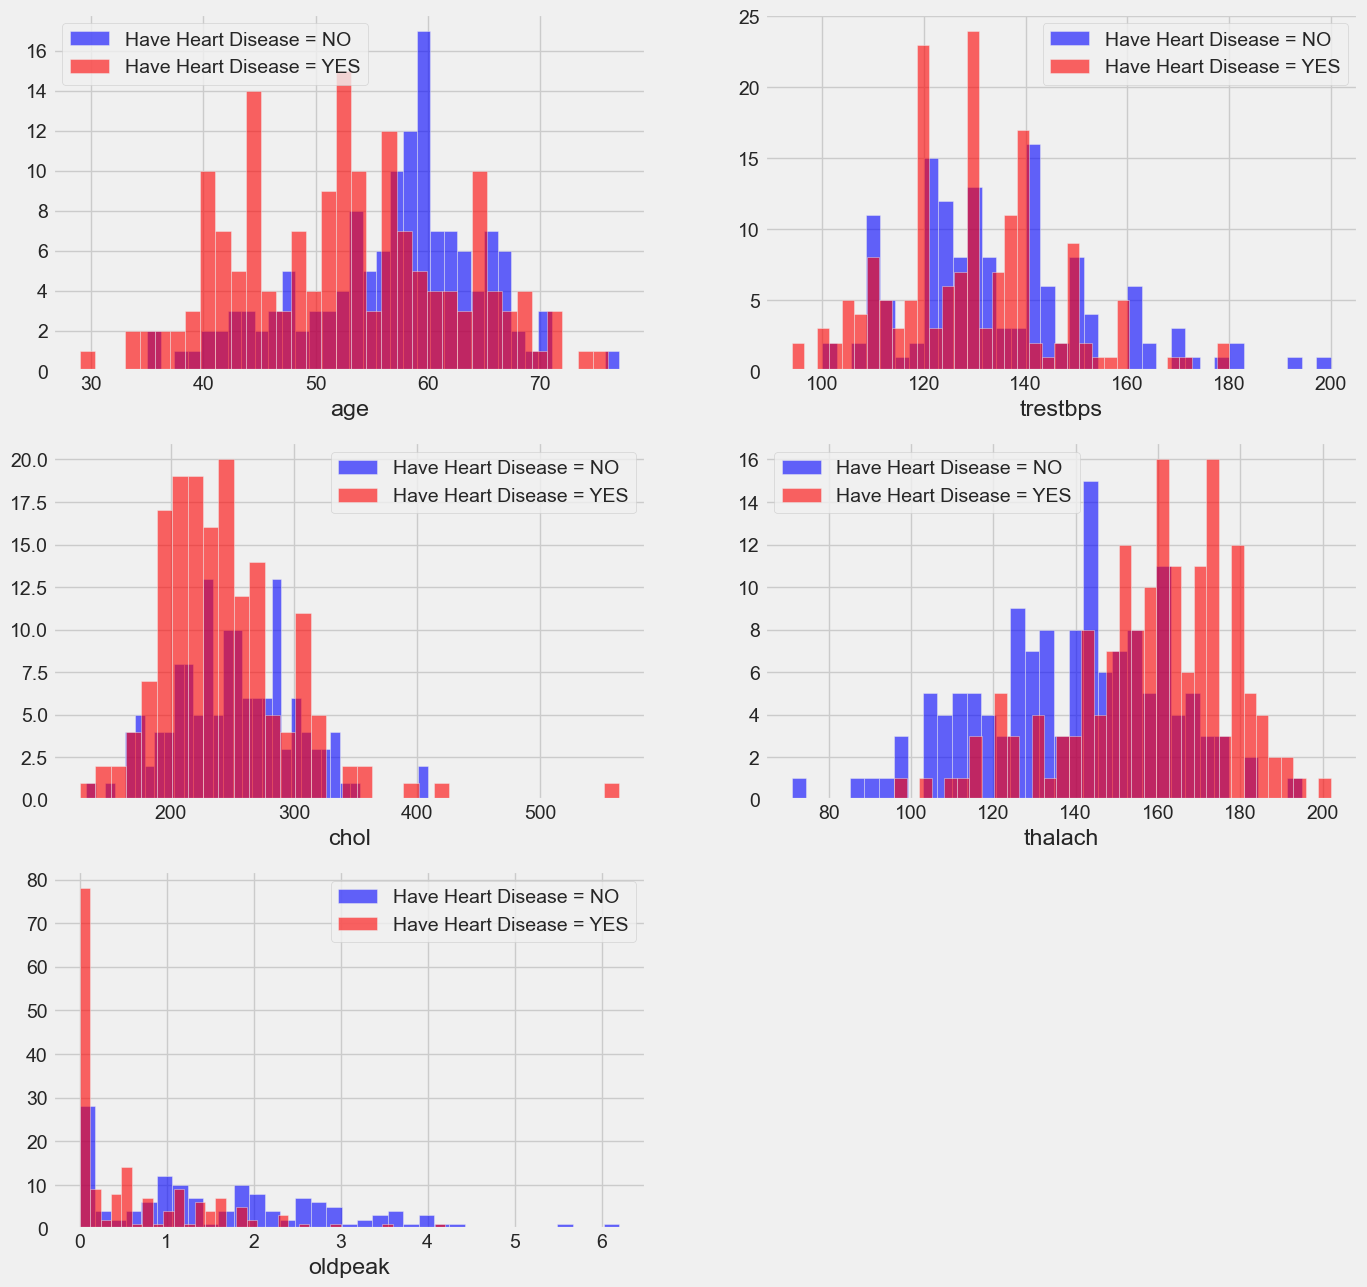

In [38]:
plt.figure(figsize=(15,15))

for i, column in enumerate(continuous_val, 1):
    plt.subplot(3,2,i)
    df[df["target"] == 0][column].hist(bins=35, color='blue', label='Have Heart Disease = NO', alpha=0.6)
    df[df['target'] == 1][column].hist(bins=35, color='red', label='Have Heart Disease = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

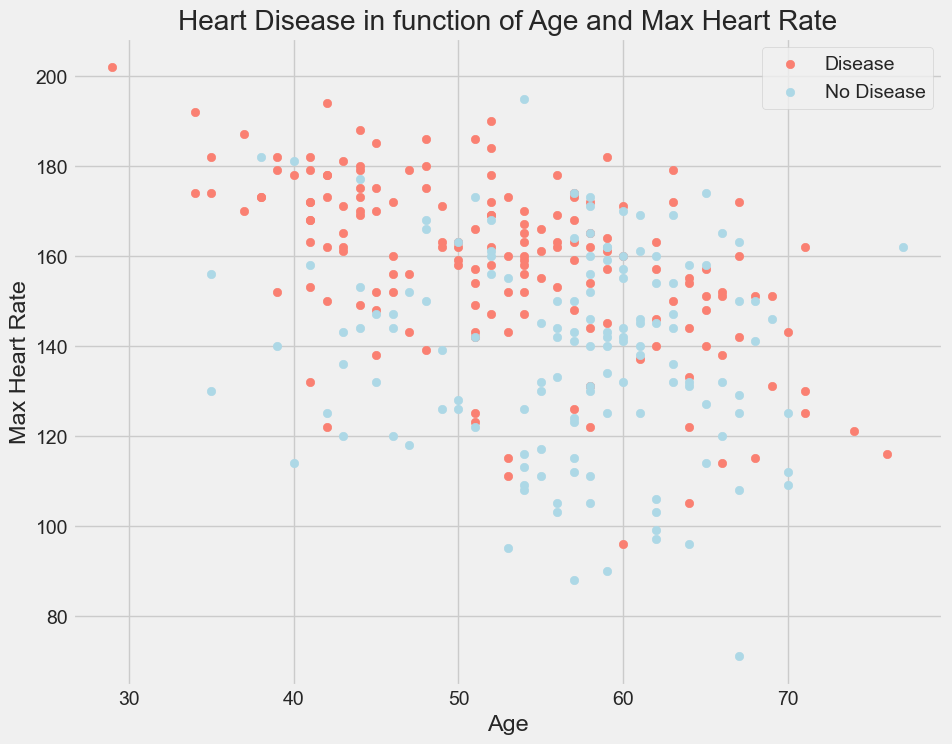

In [39]:
plt.figure(figsize=(10,8))

# Scatter with postive examples
plt.scatter(df.age[df.target==1], df.thalach[df.target == 1], c='salmon')

# Scatter with negative example
plt.scatter(df.age[df.target == 0], df.thalach[df.target == 0], c='lightblue')

# Add some helpful info
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel('Age')
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"])

(14.5, -0.5)

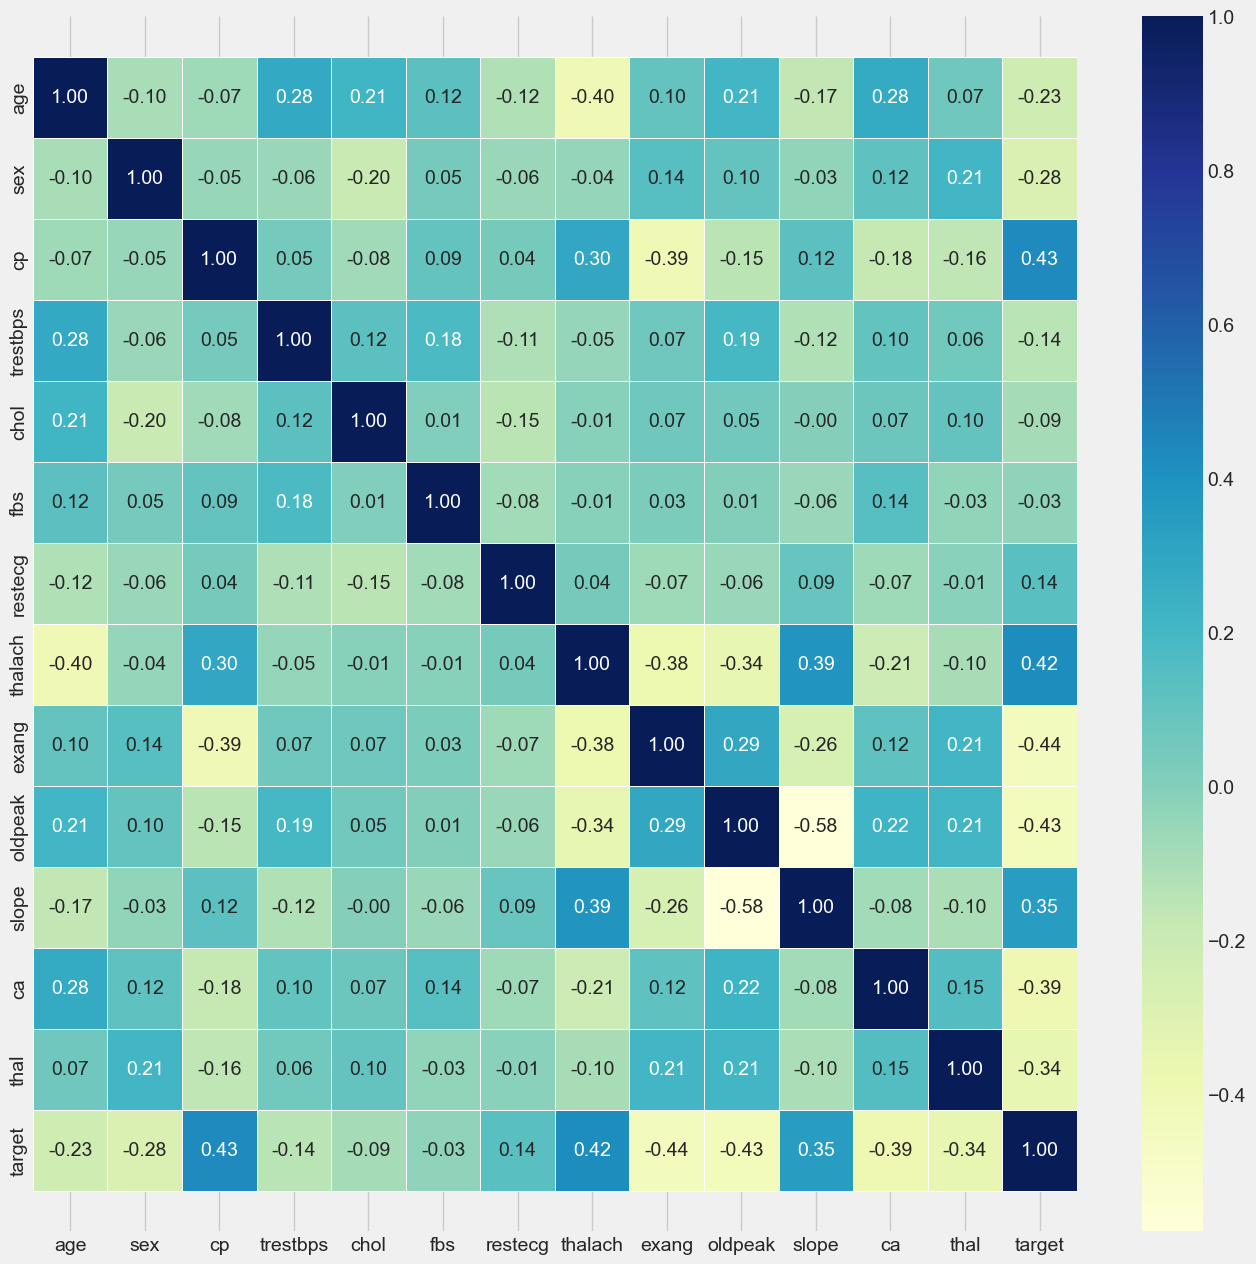

In [40]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15,15))
ax = sns.heatmap(corr_matrix, annot=True, linewidths=0.5, fmt=".2f", cmap="YlGnBu")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)


<Axes: title={'center': 'Correlation with target'}>

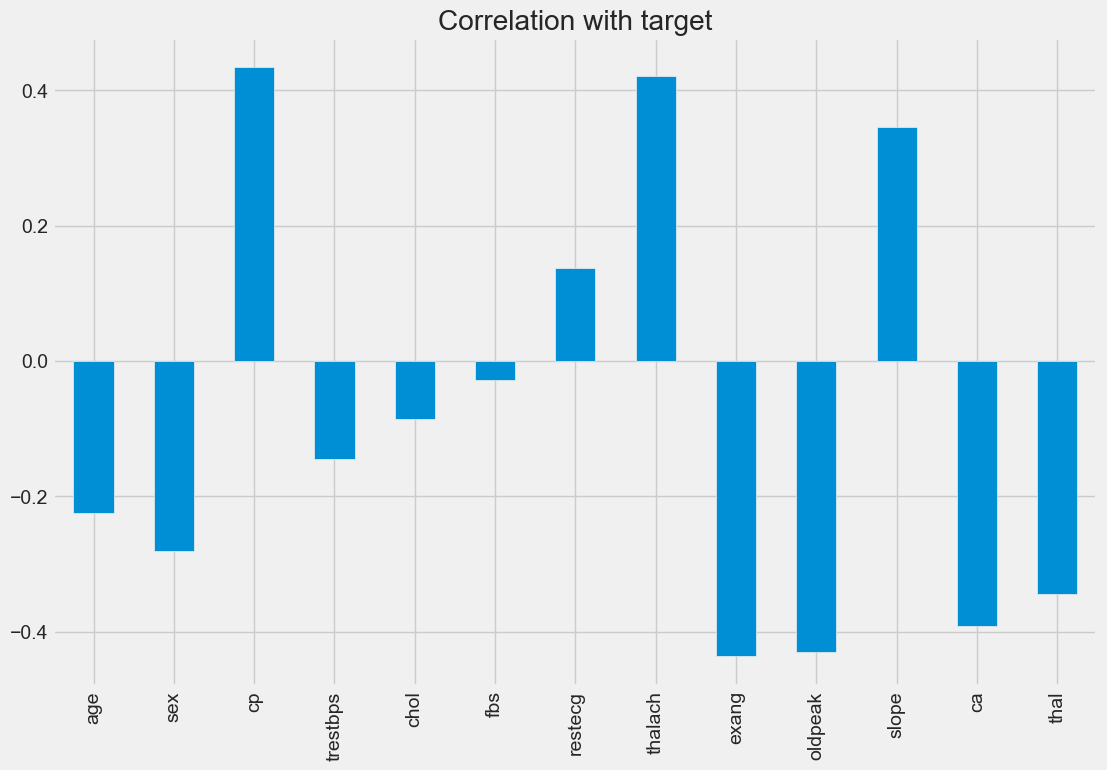

In [41]:
df.drop('target', axis=1).corrwith(df.target).plot(kind='bar', grid=True, figsize=(12, 8), title="Correlation with target")

In [42]:
# print(categorical_val)
categorical_val.remove('target')
print(df.head())
dataset = pd.get_dummies(df, columns=categorical_val)
print(dataset)
from sklearn.preprocessing import StandardScaler

s_sc = StandardScaler()
col_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset[col_to_scale] = s_sc.fit_transform(dataset[col_to_scale])

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0     2.30      0   
1   37    1   2       130   250    0        1      187      0     3.50      0   
2   41    0   1       130   204    0        0      172      0     1.40      2   
3   56    1   1       120   236    0        1      178      0     0.80      2   
4   57    0   0       120   354    0        1      163      1     0.60      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  
     age  trestbps  chol  thalach  oldpeak  target  sex_0  sex_1   cp_0  \
0     63       145   233      150     2.30       1  False   True  False   
1     37       130   250      187     3.50       1  False   True  False   
2     41       130   204      172     1.40       1   True  False  False   
3     56       120   236      178     0.80       1  False   True  False   
4     

In [43]:
from sklearn.model_selection import train_test_split

X = dataset.drop('target', axis=1)
print(X.head())
y = dataset.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    age  trestbps  chol  thalach  oldpeak  sex_0  sex_1   cp_0   cp_1   cp_2  \
0  0.95      0.76 -0.26     0.02     1.09  False   True  False  False  False   
1 -1.92     -0.09  0.07     1.63     2.12  False   True  False  False   True   
2 -1.47     -0.09 -0.82     0.98     0.31   True  False  False   True  False   
3  0.18     -0.66 -0.20     1.24    -0.21  False   True  False   True  False   
4  0.29     -0.66  2.08     0.58    -0.38   True  False   True  False  False   

   ...  slope_2  ca_0   ca_1   ca_2   ca_3   ca_4  thal_0  thal_1  thal_2  \
0  ...    False  True  False  False  False  False   False    True   False   
1  ...    False  True  False  False  False  False   False   False    True   
2  ...     True  True  False  False  False  False   False   False    True   
3  ...     True  True  False  False  False  False   False   False    True   
4  ...     True  True  False  False  False  False   False   False    True   

   thal_3  
0   False  
1   False  
2   False  
3   Fals

In [44]:
from sklearn.linear_model import LogisticRegression
from helper import print_score

lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(X_train, y_train)

print_score(lr_clf, X_train, y_train, X_test, y_test, train=True)
print_score(lr_clf, X_train, y_train, X_test, y_test, train=False)



Train Result: 
Accuracy Score:  86.79%
__________________________
Classification Report: 
               0      1  accuracy  macro avg  weighted avg
precision  0.88   0.86      0.87       0.87          0.87
recall     0.82   0.90      0.87       0.86          0.87
f1-score   0.85   0.88      0.87       0.87          0.87
support   97.00 115.00      0.87     212.00        212.00
__________________________
Confusion Matrix: 
 [[ 80  17]
 [ 11 104]] 

Test Result: 
Accuracy Score: 86.81%
_______________________
Classification Report: 
              0     1  accuracy  macro avg  weighted avg
precision  0.87  0.87      0.87       0.87          0.87
recall     0.83  0.90      0.87       0.86          0.87
f1-score   0.85  0.88      0.87       0.87          0.87
support   41.00 50.00      0.87      91.00         91.00
_______________________
Confussion Matrix: 
 [[34  7]
 [ 5 45]] 



In [45]:
from sklearn.metrics import accuracy_score

test_score = accuracy_score(y_test, lr_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, lr_clf.predict(X_train)) * 100

results_df = pd.DataFrame(data=[["Logistic Regression", train_score, test_score]], columns=["Models", 'Training Accuracy %', 'Testing Accuracy %'])
print(X_test)
print("Predict Result", lr_clf.predict(X_test))

      age  trestbps  chol  thalach  oldpeak  sex_0  sex_1   cp_0   cp_1  \
179  0.29      1.05  0.57    -1.65    -0.38  False   True   True  False   
228  0.51      2.19  0.81     0.41    -0.72  False   True  False  False   
111  0.29      1.05 -2.32     1.02    -0.72  False   True  False  False   
246  0.18      0.14  3.14     0.02     0.74   True  False   True  False   
60   1.83     -1.23  0.36    -0.86    -0.90   True  False  False  False   
..    ...       ...   ...      ...      ...    ...    ...    ...    ...   
250 -0.37      0.48  1.00    -1.21     2.73  False   True   True  False   
19   1.61      0.48 -0.14     0.06     0.66   True  False  False  False   
143  1.39     -1.46 -0.45    -0.33    -0.64   True  False   True  False   
79   0.40     -1.52 -0.12     0.19    -0.38  False   True  False  False   
144  2.39      0.48 -0.95    -1.47     0.05   True  False  False  False   

      cp_2  ...  slope_2   ca_0   ca_1   ca_2   ca_3   ca_4  thal_0  thal_1  \
179  False  ...    F

In [ ]:
def predict(data):
    real_data = pd.DataFrame(data=[[63,1,3,145,233,1,0,150,0,2.3,0,0,1,]], 
                            columns=["age","sex","cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca","thal"])

    print(real_data)
    # Step 1: One-hot encode the real test data
    # categorical_val = ['cp', 'restecg', 'slope', 'thal']  # Example categorical columns
    print(categorical_val)
    real_data_encoded = pd.get_dummies(real_data, columns=categorical_val)

    # Step 2: Reindex to match the training data
    real_data_encoded = real_data_encoded.reindex(columns=X_train.columns, fill_value=0)

    # Step 3: Standardize the features
    print(col_to_scale)
    real_data_encoded[col_to_scale] = s_sc.transform(real_data_encoded[col_to_scale])
    print(real_data_encoded)

    # Step 4: Make predictions
    predictions = lr_clf.predict(real_data_encoded)

    # prediction = lr_clf.predict(real_data_encoded)
    # predicted_probability = lr_clf.predict_proba(real_data)

    print("Predicted Classes:",  "Heart Disease YES" if predictions == 1 else "NO")
# print("Predicted Probability", predicted_probability)
# lr_clf.predict(real_data)

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0     2.30      0   

   ca  thal  
0   0     1  
['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
    age  trestbps   chol  thalach  oldpeak  sex_0  sex_1  cp_0  cp_1  cp_2  \
0 63.00    145.00 233.00   150.00     2.30      0   True     0     0     0   

   ...  slope_2  ca_0  ca_1  ca_2  ca_3  ca_4  thal_0  thal_1  thal_2  thal_3  
0  ...        0  True     0     0     0     0       0    True       0       0  

[1 rows x 30 columns]
Predicted Classes: Heart Disease YES
